## Compare to alternative models

In [1]:

from bayes_window.generative_models import generate_fake_spikes
from bayes_window.model_comparison import *
from bayes_window import BayesWindow

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=140,
                                                                n_neurons=10,
                                                                n_mice=8,
                                                                dur=7, 
                                                               mouse_response_slope=20,
                                                               overall_stim_response_strength=4)

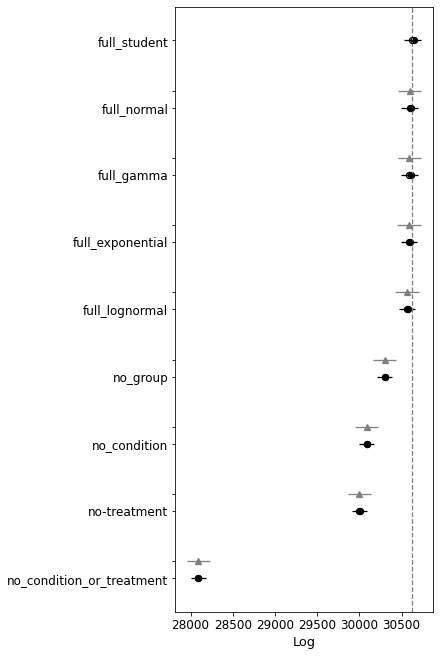

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
full_student,0,30627.625110,12.645494,0.000000,0.216476,99.737323,0.000000,False,log
full_normal,1,30594.336948,13.094965,33.288162,0.196380,97.990006,140.169036,False,log
full_gamma,2,30592.465156,12.740587,35.159954,0.204278,100.612396,141.972622,False,log
full_exponential,3,30583.746083,12.653392,43.879027,0.194650,97.329395,139.952093,False,log
full_lognormal,4,30562.290958,12.444902,65.334152,0.188282,98.271619,140.568176,False,log
no_group,5,30296.864976,7.263534,330.760134,0.000013,91.838329,135.379642,False,log
no_condition,6,30084.557554,3.664855,543.067556,0.000012,93.069499,136.595941,False,log
no-treatment,7,29999.295214,11.006048,628.329896,0.000011,88.135615,132.258351,False,log
no_condition_or_treatment,8,28090.597978,2.441281,2537.027132,0.000000,86.332740,133.033354,False,log


In [3]:
window = BayesWindow(df, y='isi', treatment='stim', group='mouse', condition='neuron')
window.fit_slopes(model=models.model_hierarchical, do_mean_over_trials=True,)
window.explore_models()

Simple one-way ANOVA:

In [4]:
window.fit_anova()

isi~stim
             sum_sq    df          F    PR(>F)
stim      0.001961   1.0  54.725683  0.000003
Residual  0.000502  14.0        NaN       NaN


True

## Linear mixed effects model

In [5]:
window = BayesWindow(df, y='isi', treatment='stim', group='mouse', condition='neuron')
window.fit_lme()
window.posterior

Using formula isi ~ 1+ (neuron__0|mouse) + (neuron__1|mouse)  + (neuron__2|mouse)  + (neuron__3|mouse)  + (neuron__4|mouse)  + (neuron__5|mouse)  + (neuron__6|mouse)  + (neuron__7|mouse)  + (neuron__8|mouse)  + (neuron__9|mouse) 
                    Coef. Std.Err.        z  P>|z|  [0.025  0.975]
Intercept           0.044    0.003   14.200  0.000   0.038   0.050
neuron__0 | mouse   0.020    0.001   39.015  0.000   0.019   0.021
neuron__1 | mouse   0.014    0.001   28.468  0.000   0.013   0.015
neuron__2 | mouse   0.010    0.001   18.942  0.000   0.009   0.010
neuron__3 | mouse   0.005    0.001   10.043  0.000   0.004   0.006
neuron__4 | mouse   0.001    0.001    1.373  0.170  -0.000   0.002
neuron__5 | mouse  -0.003    0.001   -6.202  0.000  -0.004  -0.002
neuron__6 | mouse  -0.007    0.001  -14.085  0.000  -0.008  -0.006
neuron__7 | mouse  -0.010    0.001  -20.802  0.000  -0.011  -0.009
neuron__8 | mouse  -0.014    0.001  -26.950  0.000  -0.015  -0.013
neuron__9 | mouse  -0.017    0.00

,neuron,center interval,Std.Err.,z,p,higher interval,lower interval
0,0,0.020,0.001,39.015,0.00,0.019,0.021
1,1,0.014,0.001,28.468,0.00,0.013,0.015
2,2,0.010,0.001,18.942,0.00,0.009,0.010
3,3,0.005,0.001,10.043,0.00,0.004,0.006
4,4,0.001,0.001,1.373,0.17,-0.000,0.002
5,5,-0.003,0.001,-6.202,0.00,-0.004,-0.002
6,6,-0.007,0.001,-14.085,0.00,-0.008,-0.006
7,7,-0.010,0.001,-20.802,0.00,-0.011,-0.009
8,8,-0.014,0.001,-26.950,0.00,-0.015,-0.013
9,9,-0.017,0.001,-32.904,0.00,-0.017,-0.016


In [6]:
window.plot(x='neuron')

alt.LayerChart(...)

Of course in reality, neurons don't have this consistent variation in each mouse. This would only be applicable to a priori classes of neurons